##Probability and Probability Distributions

###**Probability Relations**

Instructions:

"*Consider a test which looks for COVID-19 antibodies in the
general population. Let’s assume that 1% of our general population has these antibodies. If we can make a test which is 99% sensitive to the antibodies (i.e. we can
tell 99% of cases as true positives, 1% as false negatives) and give 95% true
negative results (5% are accidentally given a positive result) – it looks like we might be doing pretty well.*"




**Task 1**: Use your programming tool of choice and make a small script which accepts
these data as inputs and returns the probability of a positive test indicating
correctly that this person does indeed have the anti-bodies. 


In [0]:
import matplotlib.pyplot as plt  #import library
import numpy as np

In [4]:
#GIVEN INFORMATION
p=0.01 #true positive (the person really has antibodies)
n=0.99 #true negative (the person really does not have antibodies)
a=0.99 #if a person has antibodies, the probability that it will also test as pozitive 
b=0.95 #if it does not have antibodies, the probability that the person will also test negative

#CALCULATIONS
p_t=p*a + n*(1-b) #test result positive ("a" amount of people with antibodies (p) and "(1-b)"" amount of people without antibodies (n) will test positive)
n_t=n*b + p*(1-a) #test result negative ("b" amount of people without antibodies (n) and "(1-a)"" amount of people with antibodies (p) will test negative)

#Check (error if #calculations are wrong)
def unity(): 
  u=p_t+n_t #should be 1
  if u!=1:
    return(print("Error in calculations. Sum of positive and negative outcomes of the test does not equal the total number of tests taken.")) 
  if u==1:
    pass
unity()

#RESULTS
#probability of a positive test indicating correctly that this person does indeed has the anti-bodies (a_rev)
a_rev=a*p/p_t #Bayes' theorem (explanation can be found in chapter 2 (equation 2.4) of Bohm's Introduction to Statistics and Data Analysis for Physicists)
#probability of a negative test indicating correctly that this person does indeed does not have the anti-bodies (b_rev)
b_rev=b*n/n_t #Bayes' theorem

#PRINT
print("The probability of a positive test indicating correctly that this person does indeed has the anti-bodies is ", a_rev, ".")
print("The probability of a negative test indicating correctly that this person indeed does not have the anti-bodies is ", b_rev, ".")

The probability of a positive test indicating correctly that this person does indeed has the anti-bodies is  0.16666666666666655 .
The probability of a negative test indicating correctly that this person indeed does not have the anti-bodies is  0.9998936848819903 .


###Interpretation of results: Task 1

The results show that the probability of a positive test indicating correctly that a person does indeed have the anti-bodies is just below 17%. From this we can conclude that the positive outcomes of the test are not to be blindly trusted (most probably that person does not have antibodies, despite the test showing otherwise). On the other hand, if the results of the test are negative, we can be very sure that they are correct. Within the precision of the data given in the task, we can even be sure with 100% certainty that if the results of the test be negative, the person does not have antibodies. 

If this was a real-world situaton, I would recommend that in case of a test coming out as positive, multiple (or alternative) tests be repeated/performed on that person, as the positive result is clearly not a good indicator of the presence of antibodies. Just about 1 in 6 people testing positive would actually have antibodies. If I had limited resources (as one does in real-life) I would on the other hand not repeat tests on cases that turned out negative, as those results clearly are much more accurate.

**Task 2**: Using the same testing kit, how much higher would the fraction of
people with the antibodies have to be in order to give a >50% chance of the kit
giving a positive result? It might be nice to make a graph of this.

In [0]:
#graph code
#inpute names and title as stings
def graph(x, y, name_x, name_y, title):
  plt.plot(x, y)
  plt.xlabel(name_x)
  plt.ylabel(name_y)
  plt.grid()
  plt.title(title)
  plt.show

When at least about  47.874999999999  percent of population will have antibodies, test will give positive result in 50% of cases.


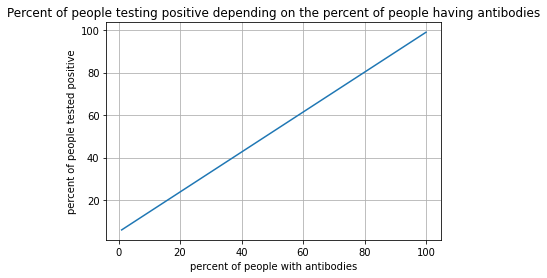

In [4]:
#create arrays of the function p_t_1 (test turning out positive) and the variable k (corresponds to the percent of people with antibodies)
p_t_1 = []
k_array = []
count = 0

for k in np.arange(1, 100, 0.005): 
  k_array.append(k)
  p_1=p*k #true positive (the person really has antibodies)
  n_1=1-k*p #true negative (the person really does not have antibodies)
  p_t_1.append((p_1*a + n_1*(1-b))*100) #recalculate positive results, with k free parameter
  if 50<p_t_1[count]<50.005:
    print("When at least about ", k, " percent of population will have antibodies, test will give positive result in 50% of cases.")
  count+=1
  #print(p_1)
  #print(n_1)
  #print(p_t_1)
  #print(50<p_t_1)
  #print("""

  #""")

  #plot the graph p_t_1(k)
plt.plot(k_array, p_t_1) #make graph
plt.xlabel('percent of people with antibodies')  #name axis
plt.ylabel('percent of people tested positive') #name axis 
plt.grid() #add grid so it's easier to read off the results
plt.title('Percent of people testing positive depending on the percent of people having antibodies') #give title
plt.show() #show graph

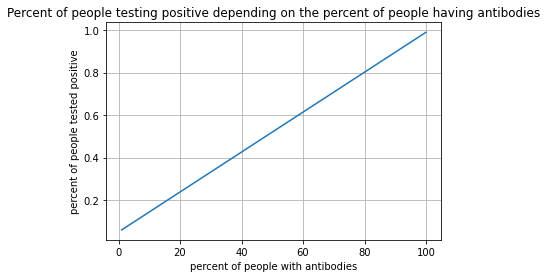

In [5]:
#alternative way of plotting the graph, by explicity writing p_t_1 as a function of k
y = []
for k in k_array:
  y.append(0.0094*k+0.05)
plt.plot(k_array, y) #make graph
plt.xlabel('percent of people with antibodies')  #name axis
plt.ylabel('percent of people tested positive') #name axis 
plt.grid()
plt.title('Percent of people testing positive depending on the percent of people having antibodies') #give title
plt.show() #show graph


In [0]:
k=(0.5-0.05)/0.0094
print(k)

47.87234042553192


Rearranging the expression for p_t_1 to find k gives the value 47,87. This means that when more than 47,87% od people will have antibodies, the results of the test will show that 50% of the people have antibodies. 

#Exercise 2

In science, often not only one thing happens – we often have a combination or a
distribution of events which have different outcomes depending on physical
variables. For example rolling multiple dice – if we add up their outcome we would
get a probability distribution describing a different probability for each outcome.
Section 3.1 of the book shows some examples. You can have both discrete (only
certain values are permitted) and continuous distributions. In both cases the
integral of the whole distribution needs to be 1. 

Task: Make a script to generate a discrete distribution, with values in the integer
bins. The script should be able to generate a Gaussian, Bionomial, Poisson and an
Exponential distribution – it should always use the same range of values to do so
(i.e. the x-axis should run from 0 to 10 for example).

[Text(0, 0.5, 'y values'), Text(0.5, 0, 'range')]

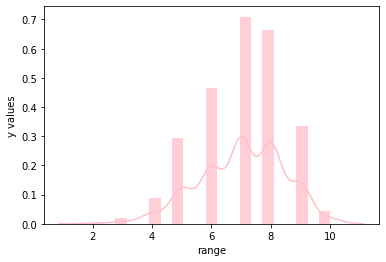

In [15]:
import seaborn
from scipy.stats import binom
data=binom.rvs(n=10,p=0.7,loc=0,size=1010)
ax=seaborn.distplot(data,
        kde=True,
        color='pink',
        hist_kws={"linewidth": 22,'alpha':0.77})
ax.set(xlabel='range',ylabel='y values')

AttributeError: ignored

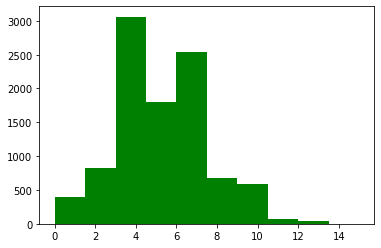

In [19]:
s=np.random.poisson(5, 10000)
plt.hist(s,10,normed=True, color='Green')

In [20]:
# Import the libraries
import matplotlib.pyplot as plt
import seaborn as sns

# matplotlib histogram
plt.hist(flights['arr_delay'], color = 'blue', edgecolor = 'black',
         bins = int(180/5))

# seaborn histogram
sns.distplot(flights['arr_delay'], hist=True, kde=False, 
             bins=int(180/5), color = 'blue',
             hist_kws={'edgecolor':'black'})
# Add labels
plt.title('Histogram of Arrival Delays')
plt.xlabel('Delay (min)')
plt.ylabel('Flights')

NameError: ignored

ValueError: ignored

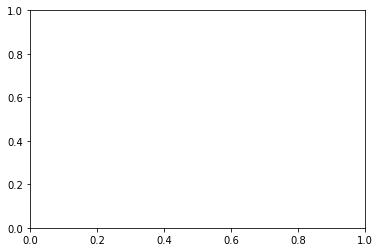

In [30]:
import numpy as np
from matplotlib import pyplot as plt

def my_dist(x):
    return np.exp(-x ** 2)

def gaussian():
  return gaussian

x = np.arange(0, 10)
p = gaussian()
plt.plot(x, p)
plt.show()

def gaussian():
  return gaussian


plt.gaussian()

In [0]:
import numpy as np
import scipy.special as sps

def discrete_gauss(n):
    f = np.array([sps.comb(n - 1, i, exact=True) for i in range(n)], dtype='O')
    f = np.float64(f)/np.float64(f).sum()

    if not np.allclose(f.sum(), 1.0):
        raise ValueError("The distribution sum is not close to 1.\n" 
                         "f.sum(): %s" % f.sum())

    return f